In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [12]:
df = pd.read_csv('german_credit.csv')
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [13]:
df.shape

(1000, 21)

In [4]:
# Lets build a Ensemble model but need to modify the dataset first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [99]:
#for feature in df.columns:
#    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
#        df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer
df1 = pd.get_dummies(df,prefix_sep='_',drop_first=True)

In [100]:
df1.head(5)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


In [101]:
# Print Shape of model data
df1.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [26]:
df1.corr()>=0.6
# Those entries under "default" column where corresponding entry is showing as True can be considered as higly correlated with 
# "default" column, similar inferences can be drawn for others as well.

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
duration_in_month,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
credit_amount,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
installment_as_income_perc,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
present_res_since,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
credits_this_bank,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
people_under_maintenance,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
account_check_status_< 0 DM,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
account_check_status_>= 200 DM / salary assignments for at least 1 year,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Drop the original variables which are converted to dummy

In [0]:
# This is done during get_dummies conversion step, please check the respective step.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [29]:
X = df1.drop('default',axis=1)
y = df1['default']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=5)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfml = RandomForestClassifier(criterion='entropy',n_jobs=2,n_estimators = 500, random_state=9999,max_depth=5, max_features=0.25, max_leaf_nodes=20)
rfml = rfml.fit(X_train,y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [37]:
from sklearn.metrics import confusion_matrix
y_pred_class = rfml.predict(X_test)
# calculate accuracy
from sklearn import metrics
print('Accuracy of the model is:',metrics.accuracy_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test,y_pred_class)


Accuracy of the model is: 0.76


array([[203,  15],
       [ 57,  25]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [44]:
rfml.feature_importances_

array([1.17136355e-01, 1.29991009e-01, 2.39812852e-02, 1.99942636e-02,
       6.17505691e-02, 1.28087800e-02, 7.19622884e-03, 8.82897769e-02,
       1.18268339e-02, 1.66240014e-01, 4.32477373e-02, 8.89613684e-03,
       6.73490691e-03, 1.28211689e-02, 8.24222259e-03, 7.22114746e-03,
       8.34420112e-03, 4.45031355e-03, 4.25242859e-03, 2.01665163e-03,
       5.58652534e-03, 2.86136158e-04, 1.10646904e-04, 1.67303238e-02,
       4.35289341e-03, 3.78501195e-03, 2.08728615e-02, 9.63094808e-03,
       5.18352486e-03, 1.31527143e-02, 1.40374138e-02, 4.01531737e-03,
       3.94559983e-03, 1.10646124e-02, 4.48667804e-03, 6.78411107e-03,
       5.85153555e-03, 1.44249798e-02, 1.64244795e-02, 3.08211649e-02,
       4.28867399e-03, 2.34268058e-02, 9.02995580e-03, 8.65137080e-03,
       1.17471597e-03, 3.57326104e-03, 9.43245664e-03, 3.43325201e-03])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [72]:
#Validate the Random Forest model build above using k fold
rfml = rfml.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
y_pred_class = rfml.predict(X_test)
# calculate accuracy
from sklearn import metrics
print('Accuracy of the model is:',metrics.accuracy_score(y_test, y_pred_class))

Accuracy of the model is: 0.73


In [63]:
#Calculate Mean score

In [73]:
scores = cross_val_score(rfml, X, y, cv=10)
scores

array([0.78, 0.7 , 0.7 , 0.78, 0.78, 0.71, 0.7 , 0.81, 0.75, 0.75])

In [74]:
scores.mean()

0.746

In [75]:
# Calculate score standard deviation using std()

In [76]:
scores.std()

0.0390384425918863

# Q8 Print the confusion matrix( 1 Marks)

In [77]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[62,  6],
       [21, 11]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [95]:
# From the above metrics, 00 = TN, 01 = FP, 10 = FN, 11 = TP, so values for all parametrs can be assigned as follows:
TP = 62
FN = 6
FP = 21
TN = 11 #now lets calculate Accuracy, precision, recall for the model
print('Accuracy of the model is:',(TP+TN)/(TP+TN+FP+FN))
print('Precision of the model is:',TP / (TP + FP))
print('Recall of the model is:',TP/(TP+FN))

Accuracy of the model is: 0.73
Precision of the model is: 0.7469879518072289
Recall of the model is: 0.9117647058823529


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [96]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

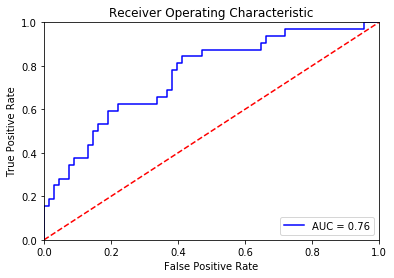

In [98]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfml.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [0]:
#Please refer to the ROC curve plotted above for AUC.

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
